<a href="https://colab.research.google.com/github/joaochenriques/AERO1_2021_2022/blob/main/Joukowski_Transform_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Joukowski Transform**

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as mpl
from IPython.display import display, Math
mpl.rcParams["figure.figsize"] = (5, 5)
%config InlineBackend.figure_formats = ['svg']

In [3]:
α, β, θ, 𝜋, ξ, ζ, ρ, Δr, Δi = symbols( r"\alpha, \beta, \theta, \pi, \xi, \zeta, \rho, \Delta{r}, \Delta{i}" )
a, c, CL, Cp = symbols( r"a, c, C_\mathrm{L}, C_\mathrm{p}" )
Uζ = symbols( r"U_{\zeta}" )

In [20]:
θ, Δr, Δi = symbols( r"\theta, \Delta{r}, \Delta{i}", real=True )
R = symbols( r"R", real=True )
c = Δr + Δi * I
ζ = R * exp( I*θ ) + c
zs = ζ + R**2 / ζ
simplify( zs )

R**2/(R*exp(I*\theta) + I*\Delta{i} + \Delta{r}) + R*exp(I*\theta) + I*\Delta{i} + \Delta{r}

In [21]:
re(zs)

R**2*(R*cos(\theta) + \Delta{r})/((R*sin(\theta) + \Delta{i})**2 + (R*cos(\theta) + \Delta{r})**2) + R*cos(\theta) + \Delta{r}

In [22]:
im(zs)

R**2*(-R*sin(\theta) - \Delta{i})/((R*sin(\theta) + \Delta{i})**2 + (R*cos(\theta) + \Delta{r})**2) + R*sin(\theta) + \Delta{i}

In [ ]:
Wξ = exp( -I*α ) * ξ + exp( -I*α ) * a**2 / ξ + I * 2 * a * sin( α + β) * log( ξ )
Wξ

\xi*exp(-I*\alpha) + 2*I*a*log(\xi)*sin(\alpha + \beta) + a**2*exp(-I*\alpha)/\xi

In [ ]:
Wζ = Wξ.subs( ξ, ζ-c )
Wζ

a**2*exp(-I*\alpha)/(\zeta - c) + 2*I*a*log(\zeta - c)*sin(\alpha + \beta) + (\zeta - c)*exp(-I*\alpha)

In [ ]:
Eq1 = Eq( Uζ, Wζ.diff( ζ ) )
Eq1

Eq(U_{\zeta}, -a**2*exp(-I*\alpha)/(\zeta - c)**2 + 2*I*a*sin(\alpha + \beta)/(\zeta - c) + exp(-I*\alpha))

In [ ]:
repl_defs = { a: sqrt( (1-Δr)**2 + Δi**2 ), c: Δr + Δi*I, β: atan2( Δi, (1-Δr) ), ζ: a*exp( I*θ ) }

Eq2 = Eq1.subs( repl_defs )
Eq2

Eq(U_{\zeta}, 2*I*sqrt(\Delta{i}**2 + (1 - \Delta{r})**2)*sin(\alpha + atan2(\Delta{i}, 1 - \Delta{r}))/(-I*\Delta{i} - \Delta{r} + sqrt(\Delta{i}**2 + (1 - \Delta{r})**2)*exp(I*\theta)) - (\Delta{i}**2 + (1 - \Delta{r})**2)*exp(-I*\alpha)/(-I*\Delta{i} - \Delta{r} + sqrt(\Delta{i}**2 + (1 - \Delta{r})**2)*exp(I*\theta))**2 + exp(-I*\alpha))

In [ ]:
repl_data = { Δr: -0.1, Δi: 0.1, α:6*pi/180.0 }

Eq3 = Eq2.subs( repl_data )
Eq3

Eq(U_{\zeta}, exp(-0.0333333333333333*I*pi) + 2.20907220343745*I*sin(0.0906598872007451 + 0.0333333333333333*pi)/(1.10453610171873*exp(I*\theta) + 0.1 - 0.1*I) - 1.0*exp(-0.0333333333333333*I*pi)/(exp(I*\theta) + 0.0905357460425185 - 0.0905357460425185*I)**2)

In [ ]:
f = ζ + 1.0 / ζ
fdash = f.diff( ζ ).subs( repl_defs ).subs( repl_data )
fdash

1 - 0.819672131147541*exp(-2*I*\theta)

In [ ]:
Uz = Eq3.rhs / fdash
Uz

(exp(-0.0333333333333333*I*pi) + 2.20907220343745*I*sin(0.0906598872007451 + 0.0333333333333333*pi)/(1.10453610171873*exp(I*\theta) + 0.1 - 0.1*I) - 1.0*exp(-0.0333333333333333*I*pi)/(exp(I*\theta) + 0.0905357460425185 - 0.0905357460425185*I)**2)/(1 - 0.819672131147541*exp(-2*I*\theta))

In [ ]:
fUZ = lambdify( θ, Eq3.rhs / fdash, 'numpy')

In [ ]:
θ_vec = np.linspace( 0.0, 2*np.pi, 401 )
UZ_vec = fUZ(θ_vec)
UZ2_vec = ( UZ_vec * np.conj(UZ_vec) ).real # this vector has only real parts

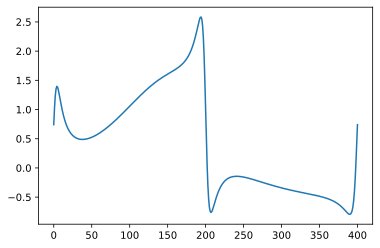

In [ ]:
Cp = -(1.0 - UZ2_vec)
mpl.plot( Cp );